## ニューラルネットワークの学習

NNの学習とは、重みとバイアスを訓練データに適応させるように調整する、「教師あり学習」である。  

NNの学習は、何を指標として、どのように適応させるのか。  
- 指標 = 損失関数（二乗和誤差、クロスエントロピー誤差、など）
- 適応 = 最適化問題（最急降下法、確率的勾配降下法、焼きなまし法、など）  
  この辺りがイジングモデルを計算する[D-wave](https://www.dwavesys.com/home)とかに関わってくるのかな^^  
  爆速で学習するみたいな。最適化問題は計算負荷がめちゃくちゃ高そう。  

用語：
- **損失関数**   
  学習が悪いということを評価する指標。 **微分できることが重要**  
  学習に使う全ての訓練データとNNの出力の比較を行ってそれらの和をとるので、データ量が多い場合は現実的でなくなる。    
  そのため、ミニバッチ学習という手法を使う。 
- **最適化問題 **  
  エネルギー最小化問題ともいうらすぃ。  
  球を坂の上に置くと、位置エネルギーが運動エネルギーになって転がっていくが、安定する位置で止まる。  
  このように損失関数という坂道を安定状態(=微分した値が0)に持っていく。
- **クロスエントロピー誤差**  
  ソフトマックスと組み合わせて分類問題で使われるっぽい  
  確率が低いほど必要な情報量が多い、つまりソフトマックスの結果の出力値が小さいほどクロスエントロピー誤差の値が大きくなる  
  [クロスエントロピーについてわかりやすい記事](http://nihaoshijie.hatenadiary.jp/entry/2017/04/26/062304) 

## NNの学習手順

1. **ミニバッチ**  
  訓練データの中から一部のデータを無作為抽出し、それらのデータをミニバッチという。  
   
2. **勾配算出**  
  ミニバッチの損失関数の坂を下るために勾配を求める
  
3. **パラメータ更新**  
  重みパラメータを勾配方向に微小量更新する

4. **繰り返し**  
  上記を繰り返す

## 3層NNの実装

図ch004-1:3層ニューラルネットワーク  
(バイアスは図字されていない)

<img border="0" src="./images/neural_network_3layer.png" width="512" height="512" alt="イラスト1">

In [1]:
# import 教材のcommonライブラリを使わせて頂く 、教材では二層NNを実装している networks/two_layer_net.py参照
# 以下と同じコードをnetworks/three_layer_net.pyとして格納している
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class ThreeLayerNet:
    # 初期化関数 NNのパラメータの初期値設定を行う
    def __init__(self, size = {'in': 10, 'hidden1': 10, 'hidden2': 10, 'out': 10},
                 weight_init_std=0.01, experiment={'init_param': False, 'func': False}):
        self.params = {}
        self.experiment = experiment
        # 重みの初期化
        # experiment[0]がTrueの時に、重みの初期値を全てゼロにする
        # paramsはNNの重みとバイアスを保持するインスタンス変数
        if self.experiment['init_param'] == False:
            self.params['W1'] = weight_init_std * np.random.randn(size['in'], size['hidden1'])
            self.params['b1'] = np.zeros(size['hidden1'])
            self.params['W2'] = weight_init_std * np.random.randn(size['hidden1'], size['hidden2'])
            self.params['b2'] = np.zeros(size['hidden2'])
            self.params['W3'] = weight_init_std * np.random.randn(size['hidden2'], size['out'])
            self.params['b3'] = np.zeros(size['out'])
        else:
            self.params['W1'] = weight_init_std * np.zeros((size['in'], size['hidden1']))
            self.params['b1'] = np.zeros(size['hidden1'])
            self.params['W2'] = weight_init_std * np.zeros((size['hidden1'], size['hidden2']))
            self.params['b2'] = np.zeros(size['hidden2'])
            self.params['W3'] = weight_init_std * np.zeros((size['hidden2'], size['out']))
            self.params['b3'] = np.zeros(size['out'])
    
    # 推論を行う
    def predict(self, input_data):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        
        a1 = np.dot(input_data, W1) + b1
        if self.experiment['func'] == False:
            z1=sigmoid(a1)
        else:
            z1=a1
        a2 = np.dot(z1, W2) + b2
        if self.experiment['func'] == False:
            z2=sigmoid(a2)
        else:
            z2=a2
        a3 = np.dot(z2, W3) + b3
        output_data = softmax(a3)
        
        return output_data
    
    # 損失関数の値を求める
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 認識精度
    def accuracy(self, x, t):
        y = self.predict(x)
        # argmaxは配列内の最大要素の位置を返す
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 重みパラメータに対する勾配を求める
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
            
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        
        return grads
    
    # 高速化版　次の章の内容含む
    def gradient(self, x, t):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        if self.experiment['func'] == False:
            z1=sigmoid(a1)
        else:
            z1=a1
        a2 = np.dot(z1, W2) + b2
        if self.experiment['func'] == False:
            z2=sigmoid(a2)
        else:
            z2=a2
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        
        # backward
        dy = (y - t) / batch_num
        
        grads['W3'] = np.dot(z2.T, dy)
        grads['b3'] = np.sum(dy, axis=0)
      
        dz2 = np.dot(dy, W3.T)
        da2 = sigmoid_grad(a2) * dz2
        grads['W2'] = np.dot(z1.T, da2)
        grads['b2'] = np.sum(da2, axis=0)
        
        dz1 = np.dot(da2, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

## MNISTデータセット

数字画像のデータセットで訓練画像とテスト画像を利用して学習と推論を実施出来る。  
ちょろっと調べた所、[keras](https://keras.io/ja/)というライブラリでMNISTを手軽に使えるらスィ。  
ここは本と少し違うやり方でMNISTを読み込んでいる。

In [2]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0

# encoding
t_train = to_categorical(t_train, 10)
t_test =  to_categorical(t_test, 10)

print(x_train.shape) # 学習用画像データ
print(t_train.shape) # 学習用画像データのラベル
print(x_test.shape)  # テスト用画像データ
print(t_test.shape)  # テスト用画像データのラベル

# 画像を表示してみる Pillowというライブラリを使って配列から画像に変換する
# pip install pillowで入れる
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

#img_show(x_train[0]) #これを実行すると画像が出てくる

Using TensorFlow backend.


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## ミニバッチ学習

訓練データから無作為に一部のデータを取り出したものをミニバッチという。
ミニバッチに対して学習を行う。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from network.two_layer_net import TwoLayerNet

class TrainNeuralNet:
    
    def __init__(self, iteration=10000, train_size=60000, batch_size=100, learning_rate=0.1, 
                 size={'in': 784, 'hidden1': 50, 'hidden2': 100, 'out': 10}, 
                 experiment={'init_param': False, 'func': False, 'layer': False}, 
                 x_train=[], t_train=[], x_test=[], t_test=[]):
        train_loss_list = []
        train_acc_list = []
        test_acc_list = []
        # 1エポック辺りの繰り返し数
        iter_per_epoch = max(train_size / batch_size, 1)
        
        if experiment['layer'] == False:
            network = ThreeLayerNet(size=size, experiment=experiment)
            keys = ['W1', 'b1', 'W2', 'b2', 'W3', 'b3']
        else:
            network = TwoLayerNet(input_size=size['in'], hidden_size=size['hidden1'], output_size=size['out'])
            keys = ['W1', 'b1', 'W2', 'b2']
            
        for i in range(iteration):
            # ミニバッチ取得
            batch_mask = np.random.choice(train_size, batch_size)
            x_batch = x_train[batch_mask]
            t_batch = t_train[batch_mask]
            
            # 勾配計算
            # grad = network.numerical_gradient(x_batch, t_batch)
            grad = network.gradient(x_batch, t_batch)
            
            # パラメータ更新
            
            for key in keys:
                network.params[key] -= learning_rate * grad[key]
            
            loss = network.loss(x_batch, t_batch)
            train_loss_list.append(loss)
            
            # 1エポックごとに認識率を計算
            if i % iter_per_epoch == 0:
                train_acc = network.accuracy(x_train, t_train)
                test_acc = network.accuracy(x_test, t_test)
                train_acc_list.append(train_acc)
                test_acc_list.append(test_acc)
                print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
                
        # グラフの描画
        markers = {'train': 'o', 'test': 's'}
        x = np.arange(len(train_acc_list))
        plt.plot(x, train_acc_list, label='train acc')
        plt.plot(x, test_acc_list, label='test acc', linestyle='--')
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.ylim(0, 1.0)
        plt.legend(loc='lower right')
        plt.show()
             

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.8039666666666667, 0.8083
train acc, test acc | 0.8787333333333334, 0.8842
train acc, test acc | 0.8995333333333333, 0.9053
train acc, test acc | 0.9097833333333334, 0.9127
train acc, test acc | 0.9140333333333334, 0.917
train acc, test acc | 0.9191333333333334, 0.9224
train acc, test acc | 0.9244, 0.9257
train acc, test acc | 0.92725, 0.9305
train acc, test acc | 0.92975, 0.9304
train acc, test acc | 0.9335333333333333, 0.9333
train acc, test acc | 0.9355666666666667, 0.9363
train acc, test acc | 0.9389333333333333, 0.9371
train acc, test acc | 0.94065, 0.9389
train acc, test acc | 0.94305, 0.9417
train acc, test acc | 0.945, 0.9423
train acc, test acc | 0.94685, 0.9436


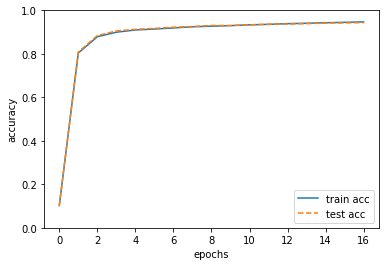

In [4]:
# 2層NN default
# 認識精度 0.9467166666666667
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, experiment={'layer': True})

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.15245, 0.1538
train acc, test acc | 0.3012, 0.3077
train acc, test acc | 0.40163333333333334, 0.4111
train acc, test acc | 0.54965, 0.5551
train acc, test acc | 0.7501833333333333, 0.7567
train acc, test acc | 0.8202, 0.827
train acc, test acc | 0.8527166666666667, 0.8583
train acc, test acc | 0.8702666666666666, 0.8735
train acc, test acc | 0.8833666666666666, 0.8859
train acc, test acc | 0.8947666666666667, 0.8952
train acc, test acc | 0.9057166666666666, 0.9073


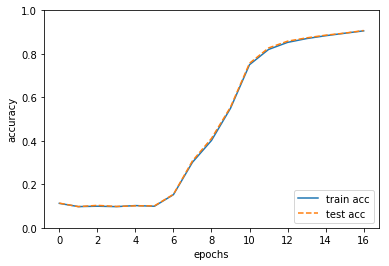

In [5]:
# 3層NN default
# 認識精度 0.9066833333333333
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test )

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11335, 0.1154
train acc, test acc | 0.23771666666666666, 0.2398
train acc, test acc | 0.29175, 0.2959
train acc, test acc | 0.3224166666666667, 0.3289
train acc, test acc | 0.32705, 0.3324
train acc, test acc | 0.34446666666666664, 0.3523
train acc, test acc | 0.34255, 0.3451
train acc, test acc | 0.3416166666666667, 0.3447


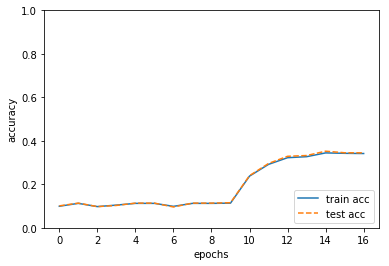

In [6]:
# 3層NN 重みの初期値をゼロにしてみる
# 認識精度 0.3489833333333333
# 次章で説明するが、重みの初期値を均一にしてしまうと学習がうまく行かない
experiment={'init_param': True, 'layer': False, 'func': False}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, experiment=experiment)

train acc, test acc | 0.10746666666666667, 0.1136
train acc, test acc | 0.2436, 0.247
train acc, test acc | 0.7061333333333333, 0.7091
train acc, test acc | 0.8329666666666666, 0.8358
train acc, test acc | 0.8573666666666667, 0.8588
train acc, test acc | 0.8825166666666666, 0.8809
train acc, test acc | 0.8942, 0.895
train acc, test acc | 0.8999166666666667, 0.9006
train acc, test acc | 0.9043, 0.9054
train acc, test acc | 0.9055666666666666, 0.9066
train acc, test acc | 0.9069833333333334, 0.9072
train acc, test acc | 0.9079666666666667, 0.9076
train acc, test acc | 0.9100666666666667, 0.9103
train acc, test acc | 0.9116333333333333, 0.912
train acc, test acc | 0.9135666666666666, 0.9133
train acc, test acc | 0.9154333333333333, 0.9148
train acc, test acc | 0.9162166666666667, 0.9157


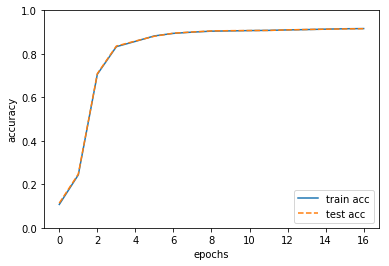

In [7]:
# 3層NN シグモイド関数を適用しない
# 認識精度 0.9140166666666667
experiment={'init_param': False, 'layer': False, 'func': True}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, experiment=experiment)

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.4370833333333333, 0.4338
train acc, test acc | 0.8904666666666666, 0.8914
train acc, test acc | 0.9321166666666667, 0.9276
train acc, test acc | 0.94685, 0.9438
train acc, test acc | 0.9577166666666667, 0.9512
train acc, test acc | 0.9611333333333333, 0.9541
train acc, test acc | 0.9665833333333333, 0.9581
train acc, test acc | 0.9695166666666667, 0.9585
train acc, test acc | 0.9706833333333333, 0.9617
train acc, test acc | 0.97635, 0.966
train acc, test acc | 0.976, 0.9635
train acc, test acc | 0.97945, 0.9647
train acc, test acc | 0.98035, 0.9669
train acc, test acc | 0.9845333333333334, 0.9684
train acc, test acc | 0.9849833333333333, 0.9683
train acc, test acc | 0.9867, 0.9674


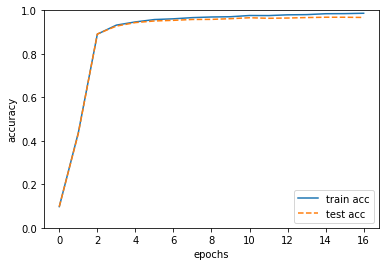

In [8]:
# 3層NN 学習率=1
# 認識精度 0.9876333333333334
# 若干過学習
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, learning_rate=1)

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.19955, 0.203
train acc, test acc | 0.3526, 0.3531
train acc, test acc | 0.5532666666666667, 0.5581
train acc, test acc | 0.7233333333333334, 0.7285
train acc, test acc | 0.7888333333333334, 0.7938
train acc, test acc | 0.8256666666666667, 0.8314
train acc, test acc | 0.8505666666666667, 0.8518
train acc, test acc | 0.8637, 0.8661
train acc, test acc | 0.8755833333333334, 0.8772
train acc, test acc | 0.8886666666666667, 0.8889
train acc, test acc | 0.89765, 0.8965
train acc, test acc | 0.9044666666666666, 0.9042
train acc, test acc | 0.9115, 0.9113
train acc, test acc | 0.9168666666666667, 0.917


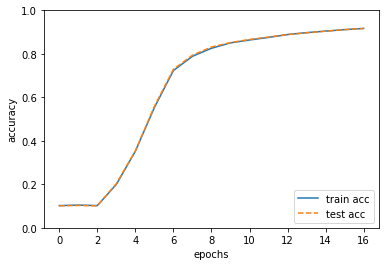

In [9]:
# 3層NN 隠れ層のサイズ変更
# 認識精度 0.9157833333333333
size={'in': 784, 'hidden1': 200, 'hidden2': 200, 'out': 10}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, size=size)

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.3244166666666667, 0.3359
train acc, test acc | 0.8678833333333333, 0.8691
train acc, test acc | 0.92215, 0.9218
train acc, test acc | 0.9384833333333333, 0.9363
train acc, test acc | 0.9428666666666666, 0.9377
train acc, test acc | 0.9604333333333334, 0.957
train acc, test acc | 0.9668333333333333, 0.9603
train acc, test acc | 0.9705, 0.9644
train acc, test acc | 0.97285, 0.9667
train acc, test acc | 0.9786166666666667, 0.9697
train acc, test acc | 0.9775833333333334, 0.9672
train acc, test acc | 0.9825166666666667, 0.9718
train acc, test acc | 0.9858166666666667, 0.9741
train acc, test acc | 0.9877333333333334, 0.975
train acc, test acc | 0.98835, 0.9749
train acc, test acc | 0.9891, 0.9759


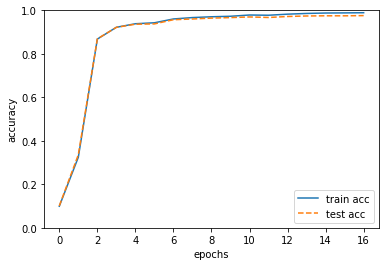

In [10]:
# 3層NN 隠れ層のサイズ変更+学習率=1
# 認識精度 0.9882333333333333
size={'in': 784, 'hidden1': 200, 'hidden2': 200, 'out': 10}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, size=size, learning_rate=1)